In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("cleaned_data.xlsx")

In [2]:
df

,States and UTs,State_Total,Enrollment,Edu_Expenditure,Literacy_Rate,Enrollment_Rate,Income_Per_Capita,Unemployment_Rate,LFPR,WPR,Urban_Share,Youth_Population (18-23)
0,Andaman and Nicobar Islands,380581,11427,6980600,77.324144,26.808840,160513,7.8,64.1,59.2,37.702355,42624
1,Andhra Pradesh,84580777,1929159,269339136,59.773345,19.237634,121762,4.2,60.4,57.8,33.363462,10028047
2,Arunachal Pradesh,1383727,64890,17247872,55.358102,39.046845,104617,7.7,51.1,47.1,22.935810,166185
3,Assam,31205576,678012,186014655,61.456892,18.679591,63657,3.9,54.2,52.1,14.095372,3629694
4,Bihar,104099452,2622946,247807398,50.436916,25.152057,27674,5.9,41.8,39.3,11.294984,10428356
5,Chandigarh,1055450,111003,10961815,76.312284,76.523711,222250,6.3,45.1,42.2,97.253210,145057
6,Chhattisgarh,25545198,656341,160628347,60.206705,21.899509,82830,2.4,66.5,64.9,23.242086,2997058
7,Dadra and Nagar Haveli,343709,8805,1785440,64.947383,17.151372,148524,5.2,69.4,65.8,46.724118,51337
8,DAMAN & DIU,243247,4000,1200000,77.454604,8.702652,200000,5.2,69.4,65.8,75.170917,45963
9,Delhi,16787941,1145390,143521950,75.874504,54.054118,244024,5.3,44.6,42.3,97.503911,2118969


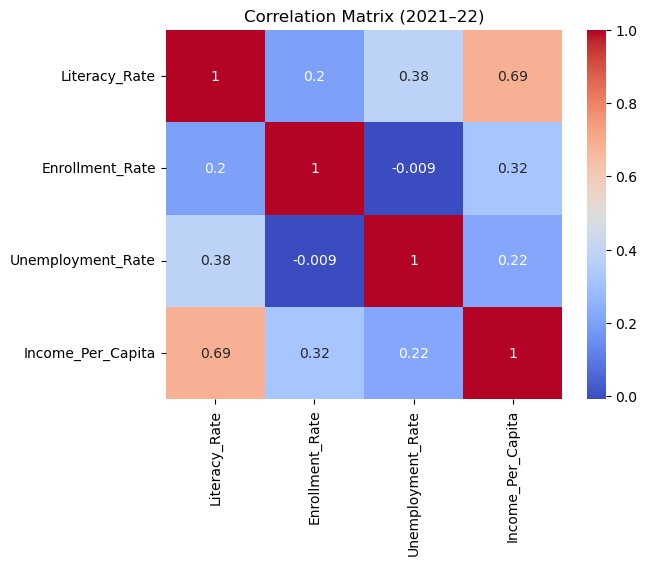

In [3]:
corr = df[["Literacy_Rate", "Enrollment_Rate", "Unemployment_Rate", "Income_Per_Capita"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (2021–22)")
plt.savefig("corr_heatmap.png")
plt.show()

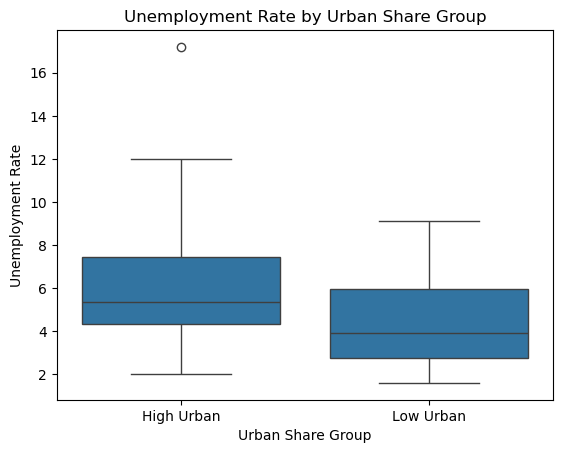

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Urban_Group'] = ['High Urban' if x > df["Urban_Share"].median() else 'Low Urban' for x in df["Urban_Share"]]

sns.boxplot(x='Urban_Group', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate by Urban Share Group')
plt.xlabel('Urban Share Group')
plt.ylabel('Unemployment Rate')
plt.show()

In [5]:
from scipy.stats import ttest_ind

high_urban = df[df["Urban_Share"] > df["Urban_Share"].median()]["Unemployment_Rate"]
low_urban = df[df["Urban_Share"] <= df["Urban_Share"].median()]["Unemployment_Rate"]
t_stat, p_val = ttest_ind(high_urban, low_urban)
print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")

T-test: t=1.94, p=0.0605


In [6]:
from sklearn.linear_model import LinearRegression

X = df[["Literacy_Rate", "Enrollment_Rate", "Edu_Expenditure"]]
y = df["Income_Per_Capita"]
model = LinearRegression()
model.fit(X, y)
print(f"R²: {model.score(X, y):.3f}, Coefs: {model.coef_}")

R²: 0.515, Coefs: [ 4.51819063e+03  8.06291795e+02 -2.19186514e-05]
